In [9]:
import os
import glob

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns



# Editable text and proper LaTeX fonts in illustrator
matplotlib.rcParams['ps.useafm'] = True
# matplotlib.rcParams['pdf.use14corefonts'] = True

# Editable fonts. 42 is the magic number
matplotlib.rcParams['pdf.fonttype'] = 42

# Use "Computer Modern" (LaTeX font) for math numbers
matplotlib.rcParams['mathtext.fontset'] = 'cm'
%matplotlib inline

sns.set(style='whitegrid', context='paper')


data_ingest_folder = os.path.join('..', '00_data_ingest' )
folder = os.path.join(data_ingest_folder, '14_ngenes_ncells_droplet')

palette_folder = os.path.join(data_ingest_folder, '15_color_palette')

cell_annotations_csv = os.path.join(data_ingest_folder, '01_droplet_raw_data', 'annotations_droplets.csv')
cell_annotations = pd.read_csv(cell_annotations_csv)
print(cell_annotations.shape)
cell_annotations.head()

(54837, 5)


,cell,tissue,cell_ontology_class,cell_ontology_term_iri,cell_ontology_id
0,10X_P4_3_AAAGTAGAGATGCCAG,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
1,10X_P4_3_AACCGCGTCCAACCAA,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
2,10X_P4_3_AACTCCCGTCGGGTCT,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019
3,10X_P4_3_AACTCTTAGTTGCAGG,Bladder,bladder cell,http://purl.obolibrary.org/obo/CL_1001319,CL:1001319
4,10X_P4_3_AACTCTTTCATAACCG,Bladder,mesenchymal cell,http://purl.obolibrary.org/obo/CL_0008019,CL:0008019


In [10]:
csv = os.path.join(data_ingest_folder, '01_droplet_raw_data', 'metadata_droplet.csv')
tenx_metadata = pd.read_csv(csv, index_col=0)
print(tenx_metadata.shape)
tenx_metadata.head()

(28, 4)


,mouse.id,tissue,subtissue,mouse.sex
channel,,,,
10X_P4_0,3-M-8,Tongue,NaN,M
10X_P4_1,3-M-9,Tongue,NaN,M
10X_P4_2,3-M-8/9,Liver,hepatocytes,M
10X_P4_3,3-M-8,Bladder,NaN,M
10X_P4_4,3-M-9,Bladder,NaN,M


In [11]:

globber = os.path.join(folder, '*_nreads_ngenes.csv')

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print('number of tissues: ', len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(51529, 4)
number of tissues:  12


,nGene,nUMI,orig.ident,tissue
10X_P4_3_AAAGTAGAGATGCCAG,2853,10291,10X,Bladder
10X_P4_3_AACCGCGTCCAACCAA,4194,17520,10X,Bladder
10X_P4_3_AACTCCCGTCGGGTCT,3347,12944,10X,Bladder
10X_P4_3_AACTCTTAGTTGCAGG,3851,19594,10X,Bladder
10X_P4_3_AACTCTTTCATAACCG,3809,14594,10X,Bladder


In [12]:
nreads_ngenes['log10_nUMI'] = np.log10(nreads_ngenes['nUMI'])

In [13]:
colors = pd.read_csv(os.path.join(palette_folder, 'tissue_colors.csv'), index_col=0, squeeze=True)

# Convert colors to dict to force mapping of tissue name to color
colors = colors.to_dict()
colors

{'Aorta': '#1f77b4',
 'Bladder': '#aec7e8',
 'Brain_Microglia': '#ff7f0e',
 'Brain_Non-microglia': '#ffbb78',
 'Colon': '#2ca02c',
 'Diaphragm': '#98df8a',
 'Fat': '#d62728',
 'Heart': '#ff9896',
 'Kidney': '#9467bd',
 'Liver': '#c5b0d5',
 'Lung': '#8c564b',
 'Mammary': '#c49c94',
 'Marrow': '#e377c2',
 'Muscle': '#f7b6d2',
 'Pancreas': '#7f7f7f',
 'Skin': '#c7c7c7',
 'Spleen': '#bcbd22',
 'Thymus': '#dbdb8d',
 'Tongue': '#17becf',
 'Trachea': '#9edae5'}

In [14]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Bladder,2500
1,Heart,624
2,Kidney,2781
3,Liver,1026
4,Lung,2141
5,Mammary,4481
6,Marrow,3652
7,Muscle,4536
8,Spleen,9552
9,Thymus,1429


In [15]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Bladder',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary',
 'Marrow',
 'Muscle',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

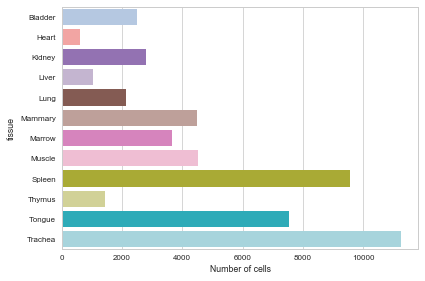

In [16]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
fig.tight_layout()
fig.savefig('figure1c_barplot_n_cells_per_tissue.pdf')